<a href="https://colab.research.google.com/github/Hyuk-Jung-Newbie/individual-repoting_JH/blob/main/%EA%B0%9C%EC%9D%B8%EA%B3%BC%EC%A0%9C_%ED%95%9C%EC%8B%9D%EB%B6%84%EB%A5%98_%EC%A0%95%ED%98%81_v0_45_0902_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd/content/drive/MyDrive/KU_LGCNS21/K-FOOD

/content/drive/MyDrive/KU_LGCNS21/K-FOOD


In [ ]:
pip install imageio

In [ ]:
import tensorflow as tf
import numpy as np
from skimage import io
from skimage.transform import rescale,resize,downscale_local_mean
import cv2
import os
import PIL
from PIL import Image
import tensorflow_datasets as tfds
from google.colab.patches import cv2_imshow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from google.colab import drive
from imageio import imread
%matplotlib inline  
print ("Package loaded") 
cwd = os.getcwd()
print ("Current folder is %s" % (cwd) )

Package loaded
Current folder is /content/drive/MyDrive/KU_LGCNS21/K-FOOD


In [ ]:
# Training set folder 

paths = {"1.Stir-fried eggplant","2.Soy Sauce Marinated Crab","3.Grilled Short Ribs","4.Braised Short Ribs","5.Short rib soup",
         "6.Grilled hairtail","7.Braised Cutlassfish","8.potato pancake","9.Braised potatoes","10.Stir-fried shredded potatoes"}
         
# The reshape size
imgsize = [100, 100]
# Grayscale
use_gray = 1
# Save name
data_name = "custom_data"

print ("Your images should be at")
for i, path in enumerate(paths):
    print (" [%d/%d] %s/%s" % (i, len(paths), cwd, path)) 

print ("Data will be saved to %s" 
       % (cwd + '/data/' + data_name + '.npz'))

Your images should be at
 [0/10] /content/5.Short rib soup
 [1/10] /content/1.Stir-fried eggplant
 [2/10] /content/8.potato pancake
 [3/10] /content/7.Braised Cutlassfish
 [4/10] /content/9.Braised potatoes
 [5/10] /content/3.Grilled Short Ribs
 [6/10] /content/6.Grilled hairtail
 [7/10] /content/10.Stir-fried shredded potatoes
 [8/10] /content/2.Soy Sauce Marinated Crab
 [9/10] /content/4.Braised Short Ribs
Data will be saved to /content/data/custom_data.npz


In [ ]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        # print ("Current Image if GRAY!")
        return rgb

In [ ]:
nclass     = len(paths)
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]
imgcnt     = 0
for i, relpath in zip(range(nclass), paths):
    path = cwd + "/" + relpath
    flist = sorted(os.listdir(path))
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path, f)        
        ## open cv 이용
        try:
          currimg=cv2.imread(fullpath, cv2.IMREAD_GRAYSCALE)
          currimg_small=cv2.resize(currimg, (100, 100))
        except Exception as e:
          print(str(e))
          continue      
        currimgvec   = np.reshape(currimg_small, (1, -1))
        # Save 
        curr_label = np.eye(nclass, nclass)[i:i+1, :]
        if imgcnt is 0:
            totalimg   = currimgvec
            totallabel = curr_label
        else:
            totalimg   = np.concatenate((totalimg, currimgvec), axis=0)
            totallabel = np.concatenate((totallabel, curr_label), axis=0)
        imgcnt    = imgcnt + 1
print ("Total %d images loaded." % (imgcnt))

KeyboardInterrupt: ignored

DIVIDE TOTAL DATA INTO TRAINING AND TEST SET

In [ ]:
def print_shape(string, x):
    print ("Shape of '%s' is %s" % (string, x.shape,))
    
randidx    = np.random.randint(imgcnt, size=imgcnt)
trainidx   = randidx[0:int(3*imgcnt/5)]
testidx    = randidx[int(3*imgcnt/5):imgcnt]
trainimg   = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
testimg    = totalimg[testidx, :]
testlabel  = totallabel[testidx, :]
print_shape("trainimg", trainimg)
print_shape("trainlabel", trainlabel)
print_shape("testimg", testimg)
print_shape("testlabel", testlabel)

SAVE TO NPZ

In [ ]:
# The reshape size를 [100,100]으로 변형
imgsize = [100, 100]

savepath = cwd + "/data/" + data_name + ".npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel, testimg=testimg, testlabel=testlabel, imgsize=imgsize, use_gray=use_gray)
print ("Saved to %s" % (savepath))

LOAD TO CHECK!

In [ ]:
# Load them!
cwd = os.getcwd()
loadpath = cwd + "/data/" + data_name + ".npz"
l = np.load(loadpath,allow_pickle=True) ##allow_pickle = true 추가
1
# See what's in here
l.files

# Parse data
trainimg_loaded = l['trainimg']
trainlabel_loaded = l['trainlabel']
testimg_loaded = l['testimg']
testlabel_loaded = l['testlabel']

print ("%d train images loaded" % (trainimg_loaded.shape[0]))
print ("%d test images loaded" % (testimg_loaded.shape[0]))
print ("Loaded from to %s" % (savepath))

NameError: ignored

PLOT RANDOMLY SELECTED TRAIN IMAGES

In [ ]:
print(trainimg_loaded.shape)

In [ ]:
ntrain_loaded = trainimg_loaded.shape[0]
batch_size = 10;
randidx = np.random.randint(ntrain_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(trainimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    if use_gray:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()

PLOT RANDOMLY SELECTED TEST IMAGES

In [ ]:
# Do batch stuff using loaded data 
ntest_loaded = testimg_loaded.shape[0]
batch_size   = 3;
randidx      = np.random.randint(ntest_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(testimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = testlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    
    if use_gray:
        currimg = np.reshape(testimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(testimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()

CONVOLUTIONAL NEURAL NETWORK WITH CUSTOM DATA

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline  
print ("Packages loaded")

Packages loaded


LOAD DATA for CONVOLUTIONAL NEURAL NETWORK 

In [ ]:
# Load them!
cwd = os.getcwd()
loadpath = cwd + "/data/custom_data.npz"
l = np.load(loadpath)

# See what's in here
print (l.files)

# Parse data
trainimg = l['trainimg']
trainlabel = l['trainlabel']
testimg = l['testimg']
testlabel = l['testlabel']
imgsize = l['imgsize']
use_gray = l['use_gray']
ntrain = trainimg.shape[0]
nclass = trainlabel.shape[1]
dim    = trainimg.shape[1]
ntest  = testimg.shape[0]
print ("%d train images loaded" % (ntrain))
print ("%d test images loaded" % (ntest))
print ("%d dimensional input" % (dim))
print ("Image size is %s" % (imgsize))
print ("%d classes" % (nclass))

['trainimg', 'trainlabel', 'testimg', 'testlabel', 'imgsize', 'use_gray']
5993 train images loaded
3996 test images loaded
10000 dimensional input
Image size is [100 100]
10 classes


In [ ]:
print(trainimg.shape, trainlabel.shape)

(5993, 10000) (5993, 10)


In [ ]:
print(testimg.shape, testlabel.shape)

(3996, 10000) (3996, 10)


In [ ]:
from sklearn.model_selection import train_test_split
trainimg_scaled = trainimg/255.0
trainimg_scaled = trainimg.reshape(-1,100,100,1)
trainimg_scaled,valimg_scaled,trainlabel,vallabel = train_test_split(trainimg_scaled,trainlabel,test_size=0.2,random_state = 2021)

합성곱 신경망 만들기

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same',input_shape = (100,100,1)))

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same',input_shape = (100,100,1)))

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 100, 100, 64)      640       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               4000100   
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)             

모델컴파일&학습

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-kfood.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=6,restore_best_weights=True)
history = model.fit(trainimg_scaled,trainlabel,epochs=20,validation_data=(valimg_scaled,vallabel),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
150/150 [==============================] - 178s 1s/step - loss: 1.1577 - accuracy: 0.6162 - val_loss: 1.9226 - val_accuracy: 0.4729
Epoch 2/20
150/150 [==============================] - 101s 673ms/step - loss: 0.7812 - accuracy: 0.7449 - val_loss: 2.1236 - val_accuracy: 0.5154
Epoch 3/20
150/150 [==============================] - 102s 677ms/step - loss: 0.5752 - accuracy: 0.8229 - val_loss: 2.3221 - val_accuracy: 0.5254
Epoch 4/20
150/150 [==============================] - 102s 680ms/step - loss: 0.4665 - accuracy: 0.8582 - val_loss: 2.6654 - val_accuracy: 0.5438
Epoch 5/20
150/150 [==============================] - 101s 674ms/step - loss: 0.3833 - accuracy: 0.8892 - val_loss: 2.8183 - val_accuracy: 0.5304
Epoch 6/20
150/150 [==============================] - 101s 672ms/step - loss: 0.3369 - accuracy: 0.9032 - val_loss: 2.9470 - val_accuracy: 0.5446
Epoch 7/20
150/150 [==============================] - 102s 678ms/step - loss: 0.2984 - accuracy: 0.9122 - val_loss: 3.2957 - va

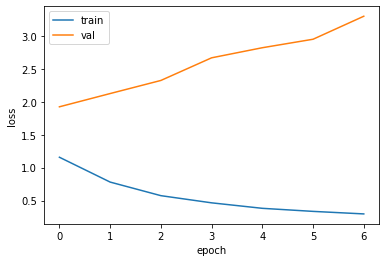

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

In [ ]:
plt.show()

In [ ]:
model.evaluate(valimg_scaled,vallabel)

38/38 [==============================] - 5s 143ms/step - loss: 1.9226 - accuracy: 0.4729


[1.9226126670837402, 0.4728940725326538]